Preprocessing

In [6]:
import skimage as ski
import numpy as np
import os
from skimage.transform import rescale, resize, downscale_local_mean

data = []
labels = []
images = []
label = 0

for folder in os.listdir("Datasets/unsynth"):
    # nb = 0
    for file in os.listdir("Datasets/unsynth/" + folder):
        # nb += 1
        # if nb >= 10:
        #     break
        img = ski.io.imread("Datasets/unsynth/" + folder + "/" + file)
        imgResized = resize(img, (300,300))
        images.append(imgResized)
        #prep = imgResized.astype(float)
        #prep = imgResized.astype(np.uint8)
        labels.append(label)
    label+=1

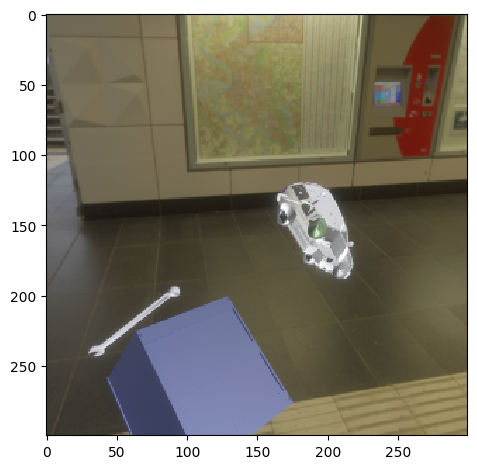

In [2]:
from matplotlib import pyplot as plt
from skimage import io
down_scaled_image = resize(images[0], (300, 300))
io.imshow(down_scaled_image)
plt.show()


Rotating

In [8]:
from skimage import io
from skimage.transform import rotate
from matplotlib import pyplot as plt
from numpy import flipud

newImages = []
newLabels = []
rotations = [0, 90, 180, 270]
for i in range(len(images)):
    originalImage = images[i]
    for rotation in rotations:
        rotatedImage = rotate(originalImage, rotation)
        newImages.append(rotatedImage)
        newLabels.append(labels[i])
        #newImages.append(np.ndarray.flatten(flipud(rotatedImage)))
        #newLabels.append(labels[i])

images.extend(newImages)
labels.extend(newLabels)

Brightness

In [6]:
from skimage import exposure

newImages = []
newLabels = []
gammas = [0.75, 0.875, 1, 1.125, 1.25]
for i in range(len(images)):
    originalImage = images[i]
    for gamma in gammas:
        brightness_changed_image = exposure.adjust_gamma(originalImage, gamma)
        newImages.append(np.ndarray.flatten(brightness_changed_image))
        newLabels.append(labels[i])
        #newImages.append(np.ndarray.flatten(flipud(rotatedImage)))
        #newLabels.append(labels[i])

images.extend(newImages)
labels.extend(newLabels)

Noise

In [ ]:
noise = np.random.normal(0, 0.2, (len(images), len(images[0]), len(images[0][0]), len(images[0][0][0])))
noised_images = images + noise
#noised_data = []
#for img in noised_images:
#    img = np.ndarray.flatten(img)
#    noised_data.append(img)

labels.extend(labels)
images.extend(noised_images)

In [ ]:
from matplotlib import pyplot as plt
from skimage import io
down_scaled_image = resize(noised_images[0], (500, 500))
io.imshow(down_scaled_image)
plt.show()

First we make a classifier based on the not augmented data:

In [6]:
len(images)

796

In [ ]:
for img in images:
    data.append(np.ndarray.flatten(img))

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



trainData, testData, trainLabel, testLabel = train_test_split(data, labels, test_size=0.2, random_state=2056621)

clf = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(100, 100, 100), random_state=2056621, max_iter=300, verbose=True)
clf.fit(trainData, trainLabel)

predLabel = clf.predict(testData)

classification_report(testLabel, predLabel)

Iteration 1, loss = 15.17468187
Iteration 2, loss = 21.59797218
Iteration 3, loss = 24.96955145
Iteration 4, loss = 25.48043816
Iteration 5, loss = 16.63819782
Iteration 6, loss = 11.06060071
Iteration 7, loss = 9.70210599
Iteration 8, loss = 9.26315813
Iteration 9, loss = 10.73860205
Iteration 10, loss = 5.61635895
Iteration 11, loss = 11.23965168
Iteration 12, loss = 8.07490225
Iteration 13, loss = 9.91309123
Iteration 14, loss = 7.85299079
Iteration 15, loss = 7.23697038
Iteration 16, loss = 7.22084545
Iteration 17, loss = 3.75109038
Iteration 18, loss = 3.19134338
Iteration 19, loss = 3.55275577
Iteration 20, loss = 3.01836717
Iteration 21, loss = 2.12714287
Iteration 22, loss = 2.72025351
Iteration 23, loss = 1.65690163
Iteration 24, loss = 1.56122775
Iteration 25, loss = 1.31739943
Iteration 26, loss = 1.38736410
Iteration 27, loss = 1.74557362
Iteration 28, loss = 2.51782109
Iteration 29, loss = 2.63202674
Iteration 30, loss = 2.17709237
Iteration 31, loss = 1.81817721
Iteration

'              precision    recall  f1-score   support\n\n           0       0.51      0.44      0.47        48\n           1       0.33      0.41      0.37        51\n           2       0.45      0.39      0.42        56\n           3       0.58      0.60      0.59        48\n\n    accuracy                           0.46       203\n   macro avg       0.47      0.46      0.46       203\nweighted avg       0.47      0.46      0.46       203\n'

Verslag
-beginnen met trainen normale dataset om gewoon te proberen(na alle images naar 1000, 1000 te doen)
-slechte resultaten zoals verwacht (slechter dan random guesses)
-dan roteren + flippen toegepast -> aantal images maal 8
-paste niet meer in RAM -> disk schrijven wat het heel traag maakte
-alleen roteren past het wel in RAM + kleinere images (1000, 1000) -> (500, 500)
-hidden layer size ook naar (100, 100, 100, 100)
-dit gaf redelijke resultaten, max iterations stond nog op 50 wel + warning niet convergeren
-na dit weg te laten convergeerde het met wat betere resultaten
-200 200 200 200 gaf niet meteen betere resultaten dan 100 100 100 100, accuracy was zelfs omlaag
-nu proberen we om aantal dingen te veranderen (changing brightness, hue, noise, and randomly combining all previous methods)

-brightness gaf goede resultaten, maar wss overfitten (5x bijna dezelfde images)
-normaliseren images doen we nu (delen door 255, helpt overfitten tegen te gaan en sneller convergeren)
-Gustavo had gezegd: training op gegenereerde en testen op echte images
-noise geeft goede resultaten (we gebruiken maar 100 100)


Volgende stappen:
-Trainen op synthetic images
-


In [1]:
import skimage as ski
import numpy as np
import os
from skimage.transform import rescale, resize, downscale_local_mean

data = []
labels = []
images = []
label = 0

for folder in os.listdir("Datasets/synth"):
    nb = 0
    for file in os.listdir("Datasets/synth/" + folder):
        if nb >= 200:
            break
        nb += 1
        img = ski.io.imread("Datasets/synth/" + folder + "/" + file)
        imgResized = resize(img, (300,300))
        images.append(imgResized)
        #prep = imgResized.astype(float)
        #prep = imgResized.astype(np.uint8)
        labels.append(label)
    label+=1

In [2]:
test_set_images = []
test_set_labels = []
label = 0
for folder in os.listdir("Datasets/unsynth"):
    # nb = 0
    for file in os.listdir("Datasets/unsynth/" + folder):
        # nb += 1
        # if nb >= 10:
        #     break
        img = ski.io.imread("Datasets/unsynth/" + folder + "/" + file)
        imgResized = resize(img, (300,300))
        test_set_images.append(imgResized)
        #prep = imgResized.astype(float)
        #prep = imgResized.astype(np.uint8)
        test_set_labels.append(label)
    label+=1

In [3]:
def RGBA_to_RGB(images):
    return np.delete(arr=images, axis=3, obj=3)

images = RGBA_to_RGB(images)

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


trainData = []
for image in images:
    trainData.append(np.ndarray.flatten(image) / 255)
trainLabel = labels
testData = []

for image in test_set_images:
    testData.append(np.ndarray.flatten(image) / 255)
testLabel = test_set_labels

clf = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(100, 100, 100), random_state=2056621, max_iter=300, verbose=True)
clf.fit(trainData, trainLabel)

predLabel = clf.predict(testData)

classification_report(testLabel, predLabel)

Iteration 1, loss = 1.40132732
Iteration 2, loss = 1.38889947
Iteration 3, loss = 1.38847073
Iteration 4, loss = 1.38746893
Iteration 5, loss = 1.38471643
Iteration 6, loss = 1.38432919
Iteration 7, loss = 1.38331718
Iteration 8, loss = 1.38215401
Iteration 9, loss = 1.38259530
Iteration 10, loss = 1.37798432
Iteration 11, loss = 1.37691347
Iteration 12, loss = 1.37526548
Iteration 13, loss = 1.36868501
Iteration 14, loss = 1.36367971
Iteration 15, loss = 1.36514340
Iteration 16, loss = 1.36223269
Iteration 17, loss = 1.34565285
Iteration 18, loss = 1.34036217
Iteration 19, loss = 1.35448849
Iteration 20, loss = 1.33544817
Iteration 21, loss = 1.33222073
Iteration 22, loss = 1.32841937
Iteration 23, loss = 1.31495019
Iteration 24, loss = 1.31719132
Iteration 25, loss = 1.30987539
Iteration 26, loss = 1.30055148
Iteration 27, loss = 1.28843269
Iteration 28, loss = 1.27417210
Iteration 29, loss = 1.27466573
Iteration 30, loss = 1.25954349
Iteration 31, loss = 1.24328000
Iteration 32, los

'              precision    recall  f1-score   support\n\n           0       0.32      0.17      0.23        52\n           1       0.28      0.29      0.29        51\n           2       0.16      0.08      0.11        50\n           3       0.24      0.46      0.31        50\n\n    accuracy                           0.25       203\n   macro avg       0.25      0.25      0.23       203\nweighted avg       0.25      0.25      0.23       203\n'

In [2]:
inputString = "              precision    recall  f1-score   support\n\n           0       0.32      0.17      0.23        52\n           1       0.28      0.29      0.29        51\n           2       0.16      0.08      0.11        50\n           3       0.24      0.46      0.31        50\n\n    accuracy                           0.25       203\n   macro avg       0.25      0.25      0.23       203\nweighted avg       0.25      0.25      0.23       203\n"
parsed_string = inputString.split('\n')
for line in parsed_string:
    print(line)

              precision    recall  f1-score   support

           0       0.32      0.17      0.23        52
           1       0.28      0.29      0.29        51
           2       0.16      0.08      0.11        50
           3       0.24      0.46      0.31        50

    accuracy                           0.25       203
   macro avg       0.25      0.25      0.23       203
weighted avg       0.25      0.25      0.23       203

